#LA_4_MIA
#Florent TACHENNE
#Victor POUSSAIN
#Stavros Kostas

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!unzip -uq "/content/drive/MyDrive/SICOM/MedicalImageAnalysis/head-ct-hemorrhage.zip" -d "/content/drive/MyDrive/SICOM/MedicalImageAnalysis/"

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load dataset (images and tags)

In [ ]:
folder = "/content/drive/MyDrive/SICOM/MedicalImageAnalysis/head_ct/"
label_filename = "/content/drive/MyDrive/SICOM/MedicalImageAnalysis/labels.csv"

In [ ]:

# Load the image dataset from the directory
dataset = tf.keras.utils.image_dataset_from_directory(folder, color_mode="grayscale")

labels_set = np.array(pd.read_csv(label_filename))[:, 1]



Found 200 files belonging to 1 classes.


In [ ]:
# Extract labels and features from the dataset
labels = []
features = []
for data in dataset:
    features.append(data[0])
for label in labels_set:
    labels.append(labels_set[0])
# Concatenate features and labels
features = tf.concat(features, axis=0)
labels = tf.constant(labels)

### Hyperparameters

In [ ]:
BATCH_SIZE = 32
INPUT_SHAPE = (256, 256, 1)
EPOCHS = 500

##Preprocessing:

## Normalization

In [ ]:
features_array = np.array(features)
for img in features_array:
    img = img / 255
labels_array = np.array(labels)

## Train and test split
The dataset is split using 80% for training and 20% for testing.


In [ ]:
# Split the dataset into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(
    features_array, labels_array, test_size=0.2, random_state=42
)

## Model
The MobileNet model is chosen comparing the different models available on keras (https://keras.io/api/applications/). We selected it for its reasonable accuracy comparing its number of parameters (low as this classification task is not so difficult).
We modified the original configuration by adding dropout to avoid overfitting, using max pooling to select features and only one class (hemorrhage).

In [ ]:
model = tf.keras.applications.MobileNet(
    input_shape=INPUT_SHAPE,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=max,
    classes=1,
    classifier_activation="softmax",
)
#model.summary()

The model was compiled using Adam to optimize the parameter of the network. This algorithm makes use of past gradients and is one of the best so far. As we are performing classification, Binary Cross Entropy is selected as loss function. We also added all the metrics useful for a classification task.
Finally, 30% of the training set was used as validation set in order to select the best parameters while training.

In [ ]:
 model.compile(optimizer=tf.keras.optimizers.Adam(),
   loss=tf.keras.losses.BinaryCrossentropy(),
       metrics=[
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.FalsePositives(),
    ])
history = model.fit(
    x=train_features,
    y=train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose="auto",
    callbacks=None,
    validation_split=0.3,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=BATCH_SIZE,
    validation_freq=1,
)

Epoch 1/500
4/4 [==============================] - 22s 695ms/step - loss: 0.7215 - true_negatives: 0.0000e+00 - true_positives: 112.0000 - false_negatives: 0.0000e+00 - false_positives: 0.0000e+00 - val_loss: 0.6556 - val_true_negatives: 0.0000e+00 - val_true_positives: 48.0000 - val_false_negatives: 0.0000e+00 - val_false_positives: 0.0000e+00
Epoch 2/500
4/4 [==============================] - 1s 184ms/step - loss: 0.1772 - true_negatives: 0.0000e+00 - true_positives: 112.0000 - false_negatives: 0.0000e+00 - false_positives: 0.0000e+00 - val_loss: 0.6177 - val_true_negatives: 0.0000e+00 - val_true_positives: 48.0000 - val_false_negatives: 0.0000e+00 - val_false_positives: 0.0000e+00
Epoch 3/500
4/4 [==============================] - 1s 197ms/step - loss: 0.0385 - true_negatives: 0.0000e+00 - true_positives: 112.0000 - false_negatives: 0.0000e+00 - false_positives: 0.0000e+00 - val_loss: 0.5792 - val_true_negatives: 0.0000e+00 - val_true_positives: 48.0000 - val_false_negatives: 0.0000

In [ ]:
print(history.history)

{'loss': [0.7215069532394409, 0.17715997993946075, 0.03854958340525627, 0.011439567431807518, 0.004834687802940607, 0.0029261375311762094, 0.0018041309667751193, 0.0012067684438079596, 0.0008989352500066161, 0.000750269100535661, 0.0006725424900650978, 0.0006096786237321794, 0.0005654767737723887, 0.000529338198248297, 0.0005006635910831392, 0.00047973651089705527, 0.0004598864179570228, 0.00044120397069491446, 0.0004275245883036405, 0.0004224141302984208, 0.0004010941192973405, 0.0003957394801545888, 0.00037905407953076065, 0.00039775617187842727, 0.0003647799894679338, 0.0003561302146408707, 0.00034273977507837117, 0.00033829573658294976, 0.0003335965157020837, 0.0003188035043422133, 0.00031612819293513894, 0.00030652963323518634, 0.00030123715987429023, 0.00029524974524974823, 0.0002971968788187951, 0.00028379596187733114, 0.0002762696531135589, 0.00026918452931568027, 0.00026186963077634573, 0.0002561864093877375, 0.00024963164469227195, 0.00024945486802607775, 0.000244844908593222

## Loss
As we can see, the loss converges through the epochs. 500 epochs might even be too much. Early stopping could have be performed to reduce training time.  

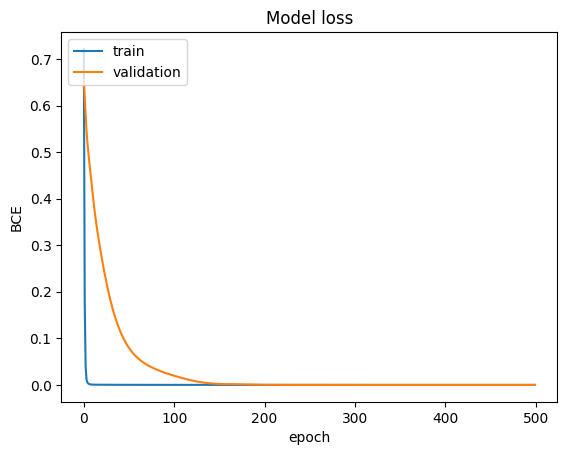

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('BCE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Evaluate the model on testing set
As we disposed of 200 images and the split was 80/20, our testing set is composed of 40 images. We can observe that our model correctly predicts the 40 images of the testing set. However, it is weard that this set does not contain healthy images (without hemmorhage) as there was in the original dataset.

In [ ]:
results = model.evaluate(
    x=test_features,
    y=test_labels,
    batch_size=BATCH_SIZE,
    verbose="auto",
    sample_weight=None,
    steps=None,
    callbacks=None,
    return_dict=False
)
print(results)

2/2 [==============================] - 0s 366ms/step - loss: 1.0660e-05 - true_negatives: 0.0000e+00 - true_positives: 40.0000 - false_negatives: 0.0000e+00 - false_positives: 0.0000e+00
[1.0659730833140202e-05, 0.0, 40.0, 0.0, 0.0]


## Conclusion
We have seen in this labwork that simple medical image classification task such as assessing brain hemorrhages could be achieved with a classic MobileNet convolutional neural network (CNN). As this model provided 100% accuracy, we decided not to compare with other models. A future work could be to test another CNN such as U-Net in order to segment the ill images and get an idea of the extension of the hemorrhage.